<div style="color: red; text-align: center;">
    <h4>Amna Muzaffar</h4>
    <h4>04072013003</h4>
    <h4>Assignment2</h4>
</div>

iv>


# Load DataSet

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')


In [2]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Data Preprocessing

In [3]:
#Checking Null Values
print(data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [4]:
#Checking for any categorical values
print(data.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [5]:
#Checking for duplicate rows
print("Duplicate Rows:",data[data.duplicated()])


Duplicate Rows: Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


# Seperating Ground truth

In [6]:
#Seperating Ground truth
X = data.drop('price_range', axis=1)
y = data['price_range']

# Binary and Numerical Data


In [7]:
#Checking Binary features
binary_columns = [col for col in X.columns if X[col].nunique() == 2]
print("Binary Columns:")
print(binary_columns)


Binary Columns:
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


In [8]:
#Label Encoding these Binary features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in binary_columns:
    X[col] = label_encoder.fit_transform(X[col])
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [9]:
# Select numerical columns
numerical_columns = X.select_dtypes(include=[np.number]).columns.difference(binary_columns)

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')


# Standarize Data

In [10]:
#Standarize Numerical Features
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_columns' contains
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (1600, 20)
X_test: (400, 20)
y_train: (1600,)
y_test: (400,)


# Performing KNN

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}

# Create KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters on the validation set
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
accuracy_val = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy with Best Parameters in KNN: {accuracy_val}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11}
Testing Accuracy with Best Parameters in KNN: 0.6725


# Decison Tree just to check Accuracy as MultiClass Y-label

In [13]:
#Just to Check as I have Multiclass ground truth
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_test_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy Using Decision Tree : {accuracy_test}")




Testing Accuracy Using Decision Tree : 0.8375


In [14]:
def min_max_normalization(df, columns):
    # Min-Max normalization
    df[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())
    return df
def one_hot_encode(labels, num_classes):
    return pd.get_dummies(labels).values


# Normalization for Neural Networks

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
X = data.drop('price_range', axis=1)
y = data['price_range']
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
numerical_columns = X.select_dtypes(include=[np.number]).columns.difference(binary_columns)
X = min_max_normalization(X, columns=numerical_columns)
num_classes = len(np.unique(y))
y = one_hot_encode(y, num_classes)

# Print the number of classes to verify
print(f"Number of classes: {num_classes}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Number of classes: 4


# Neural Networks Implementation

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_weights(input_size, hidden_units, weight_init='random'):
    if weight_init == 'random':
        W1 = np.random.randn(input_size, hidden_units) * np.sqrt(2 / input_size)
        W2 = np.random.randn(hidden_units, num_classes) * np.sqrt(2 / hidden_units)
    elif weight_init == 'zero':
        W1 = np.zeros((input_size, hidden_units))
        W2 = np.zeros((hidden_units, num_classes))
    else:
        raise ValueError("Invalid weight initialization method")

    b1 = np.zeros((1, hidden_units))
    b2 = np.zeros((1, num_classes))
    return W1, b1, W2, b2
def evaluate_model(X, y, W1, b1, W2, b2):
    A1, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=1)
    true_labels = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == true_labels)
    return accuracy
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A1, A2

def compute_loss(A2, y, W1, W2, lambd=0.01):
    m = y.shape[0]
    # Add L2 regularization term to the loss
    reg_term = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = -np.sum(y * np.log(A2)) / m + reg_term
    return loss


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def backward_propagation(X, A1, A2, y, W1, W2, lambd=0.01):
    m = y.shape[0]
    dZ2 = A2 - y
    # Include L2 regularization term in the gradients
    dW2 = (np.dot(A1.T, dZ2) + lambd * W2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * (A1 * (1 - A1))
    # Include L2 regularization term in the gradients
    dW1 = (np.dot(X.T, dZ1) + lambd * W1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate, gradient_clip=1.0):
    # Clip gradients to prevent exploding gradients
    dW1 = np.clip(dW1, -gradient_clip, gradient_clip)
    db1 = np.clip(db1, -gradient_clip, gradient_clip)
    dW2 = np.clip(dW2, -gradient_clip, gradient_clip)
    db2 = np.clip(db2, -gradient_clip, gradient_clip)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2




def train_neural_network(X, y, hidden_units, learning_rate, epochs, weight_init, lambd=0.01):
    input_size = X.shape[1]
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_units) 

    for epoch in range(epochs):
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(A2, y, W1, W2, lambd)
        dW1, db1, dW2, db2 = backward_propagation(X, A1, A2, y, W1, W2, lambd)
        # Inside your training loop
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate, gradient_clip=1.0)

        losses.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W1, b1, W2, b2, losses
    




# Weights Initialization(Random and Zero)


Training Neural Network with 2 hidden units, Weight Initialization: zero
Epoch 0, Loss: 1.4957919836071791
Epoch 100, Loss: 1.4446371498411625
Epoch 200, Loss: 1.4214717864053021
Epoch 300, Loss: 1.410675000595254
Epoch 400, Loss: 1.4053685883445313
Epoch 500, Loss: 1.4025207030032965
Epoch 600, Loss: 1.4007925569595339
Epoch 700, Loss: 1.3995891860843777
Epoch 800, Loss: 1.3986433533988163
Epoch 900, Loss: 1.3978332575725367

Training Neural Network with 3 hidden units, Weight Initialization: zero
Epoch 0, Loss: 1.6417461630781613
Epoch 100, Loss: 1.4660943183611537
Epoch 200, Loss: 1.4161579156747455
Epoch 300, Loss: 1.3987178736352135
Epoch 400, Loss: 1.3919224633462253
Epoch 500, Loss: 1.3889555413898975
Epoch 600, Loss: 1.38741200665067
Epoch 700, Loss: 1.3864045251045103
Epoch 800, Loss: 1.3856000707097587
Epoch 900, Loss: 1.3848723058008539

Training Neural Network with 4 hidden units, Weight Initialization: zero
Epoch 0, Loss: 1.5746197846275298
Epoch 100, Loss: 1.414915604903

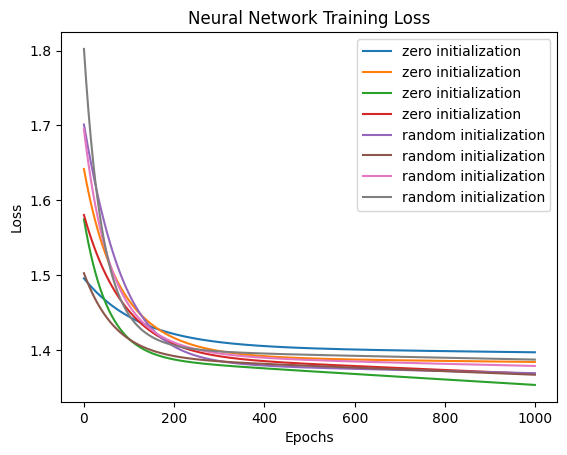

In [17]:
# # Assuming num_classes is the number of classes in your dataset
num_classes = 4

# # Train Neural Network with different hidden units and weight initialization methods
hidden_units_list = [2, 3, 4, 5]
# hidden_units_list = [5]
weight_init_methods = ['zero', 'random']
learning_rate = 0.01  # Keep the learning rate fixed
epochs = 1000

for weight_init in weight_init_methods:
    for hidden_units in hidden_units_list:
        print(f"\nTraining Neural Network with {hidden_units} hidden units, Weight Initialization: {weight_init}")
        losses = []  # Initialize losses here
        W1, b1, W2, b2, losses = train_neural_network(X_train, y_train, hidden_units, learning_rate, epochs, weight_init)
        plt.plot(losses, label=f'{weight_init} initialization')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss')
plt.legend()
plt.show()

# Neural Networks with different Learning Rates and Zero Weight


Training Neural Network with Learning Rate: 0.1
Epoch 0, Loss: 1.6667978463229172
Epoch 100, Loss: 1.3811959002909795
Epoch 200, Loss: 1.3608895806496477
Epoch 300, Loss: 1.3346907130312087
Epoch 400, Loss: 1.2978223936586275
Epoch 500, Loss: 1.2470560339924273
Epoch 600, Loss: 1.1816800681372053
Epoch 700, Loss: 1.1061301200572635
Epoch 800, Loss: 1.0295626460767648
Epoch 900, Loss: 0.959553255003815

Training Neural Network with Learning Rate: 0.05
Epoch 0, Loss: 1.931327937824006
Epoch 100, Loss: 1.398113291948278
Epoch 200, Loss: 1.3849095952713777
Epoch 300, Loss: 1.3726394733412286
Epoch 400, Loss: 1.3595034608500731
Epoch 500, Loss: 1.34486817880704
Epoch 600, Loss: 1.3281828736940842
Epoch 700, Loss: 1.308927054619222
Epoch 800, Loss: 1.2866261327039565
Epoch 900, Loss: 1.2609583491306844

Training Neural Network with Learning Rate: 0.5
Epoch 0, Loss: 1.6571465694498035
Epoch 100, Loss: 1.1664753893875115
Epoch 200, Loss: 0.8409852299124104
Epoch 300, Loss: 0.6694157588858213


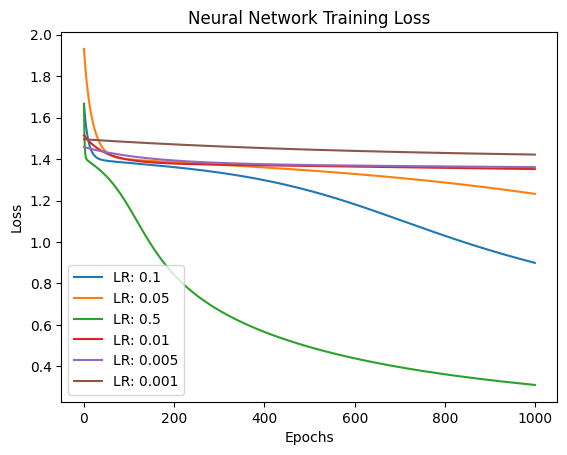

In [18]:
# Modify your training function to accept learning rate as an argument
weigh_init="zero"
hidden_units=5
# Train Neural Network with different learning rates
learning_rates = [0.1, 0.05,0.5, 0.01, 0.005, 0.001]
for lr in learning_rates:
    print(f"\nTraining Neural Network with Learning Rate: {lr}")
    losses = []
    
    # Assuming train_neural_network returns W1, b1, W2, b2, losses
    W1, b1, W2, b2, losses = train_neural_network(X_train, y_train, hidden_units, lr, epochs, weight_init)

    # Plot loss graph inside the loop
    plt.plot(losses, label=f"LR: {lr}")

    # Corrected indentation for xlabel and ylabel
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

plt.title('Neural Network Training Loss')
plt.legend()
plt.show()


# Neural Networks with different Learning Rates and random Weight


Training Neural Network with Learning Rate: 0.1
Epoch 0, Loss: 1.4517871190472014
Epoch 100, Loss: 1.3547756602346357
Epoch 200, Loss: 1.3212462620776773
Epoch 300, Loss: 1.2746961547776963
Epoch 400, Loss: 1.2132618375838253
Epoch 500, Loss: 1.1399955114235287
Epoch 600, Loss: 1.0628063911018835
Epoch 700, Loss: 0.9898832050649634
Epoch 800, Loss: 0.9255776880857346
Epoch 900, Loss: 0.8704715498482354

Training Neural Network with Learning Rate: 0.05
Epoch 0, Loss: 1.4639523204030087
Epoch 100, Loss: 1.3825296301956032
Epoch 200, Loss: 1.3756179580449097
Epoch 300, Loss: 1.3682296315543596
Epoch 400, Loss: 1.3597394262002123
Epoch 500, Loss: 1.3497629429409492
Epoch 600, Loss: 1.3379107959203227
Epoch 700, Loss: 1.3237902892179394
Epoch 800, Loss: 1.307026102995406
Epoch 900, Loss: 1.2873061722411423

Training Neural Network with Learning Rate: 0.5
Epoch 0, Loss: 1.421959761821982
Epoch 100, Loss: 1.2861358767296516
Epoch 200, Loss: 0.9374352012931204
Epoch 300, Loss: 0.7178175777252

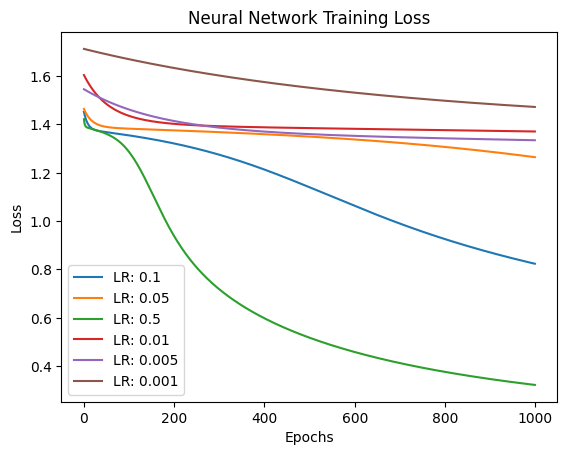

In [19]:
# Modify your training function to accept learning rate as an argument
weigh_init="random"
hidden_units=5
# Train Neural Network with different learning rates
learning_rates = [0.1, 0.05,0.5, 0.01, 0.005, 0.001]
for lr in learning_rates:
    print(f"\nTraining Neural Network with Learning Rate: {lr}")
    losses = []
    
    # Assuming train_neural_network returns W1, b1, W2, b2, losses
    W1, b1, W2, b2, losses = train_neural_network(X_train, y_train, hidden_units, lr, epochs, weight_init)

    # Plot loss graph inside the loop
    plt.plot(losses, label=f"LR: {lr}")

    # Corrected indentation for xlabel and ylabel
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

plt.title('Neural Network Training Loss')
plt.legend()
plt.show()


# Early Stopping in Neural Networks and Mddel Accuracies

In [20]:
def train_neural_network_early_stopping(X_train, y_train, X_val, y_val, hidden_units, learning_rate, epochs, weight_init='zero', patience=10):
    input_size = X_train.shape[1]
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_units, weight_init)
    best_val_loss = float('inf')
    patience_counter = 0
    losses = []

    for epoch in range(epochs):
        A1_train, A2_train = forward_propagation(X_train, W1, b1, W2, b2)
        loss_train = compute_loss(A2_train, y_train, W1, W2)

        A1_val, A2_val = forward_propagation(X_val, W1, b1, W2, b2)
        loss_val = compute_loss(A2_val, y_val, W1, W2)
        losses.append(loss_val)
        
        dW1, db1, dW2, db2 = backward_propagation(X_train, A1_train, A2_train, y_train, W1, W2)
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Check for early stopping
        if loss_val < best_val_loss:
            best_val_loss = loss_val
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter == patience:
            print(f"Early stopping at epoch {epoch}. Learning Rate: {learning_rate}, Best validation loss: {best_val_loss}")
            break

    # Calculate and return training, validation, and testing accuracies
    train_accuracy = evaluate_model(X_train, y_train, W1, b1, W2, b2)
    val_accuracy = evaluate_model(X_val, y_val, W1, b1, W2, b2)
    test_accuracy = evaluate_model(X_test, y_test, W1, b1, W2, b2)

    return W1, b1, W2, b2, losses[-1], train_accuracy, val_accuracy, test_accuracy

# Learning rates to experiment with
learning_rates = [0.1, 0.05, 0.5, 0.01, 0.005, 0.001]
epochs = 1000

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Neural Network with early stopping for different learning rates
for lr in learning_rates:
    print(f"\nTraining Neural Network with Learning Rate: {lr}")
    W1, b1, W2, b2, final_loss, train_accuracy, val_accuracy, test_accuracy = train_neural_network_early_stopping(X_train, y_train, X_val, y_val, hidden_units, lr, epochs, 'random')
    print(f"Final Loss for Learning Rate {lr}: {final_loss}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")



Training Neural Network with Learning Rate: 0.1
Final Loss for Learning Rate 0.1: 0.9753884563042847
Training Accuracy: 0.6864285714285714
Validation Accuracy: 0.6933333333333334
Testing Accuracy: 0.6666666666666666

Training Neural Network with Learning Rate: 0.05
Final Loss for Learning Rate 0.05: 1.1170315779964435
Training Accuracy: 0.5835714285714285
Validation Accuracy: 0.6266666666666667
Testing Accuracy: 0.6566666666666666

Training Neural Network with Learning Rate: 0.5
Final Loss for Learning Rate 0.5: 0.3864316839781254
Training Accuracy: 0.9371428571428572
Validation Accuracy: 0.94
Testing Accuracy: 0.93

Training Neural Network with Learning Rate: 0.01
Final Loss for Learning Rate 0.01: 1.3325745223119996
Training Accuracy: 0.38142857142857145
Validation Accuracy: 0.39666666666666667
Testing Accuracy: 0.37333333333333335

Training Neural Network with Learning Rate: 0.005
Final Loss for Learning Rate 0.005: 1.3752348894621855
Training Accuracy: 0.2907142857142857
Validatio